# Modelos Lineares Generalizados

**Referências e Leituras sugeridas:**


- Paula, G. A. Modelos de regressão: com apoio computacional. São Paulo: IME-USP, 2024. Disponível em https://www.ime.usp.br/~giapaula/texto_2024.pdf

- Dobson, A. J.; Barnett, Adrian G. (2018). An introduction to generalized linear models. CRC press.

- https://www.statsmodels.org/stable/glm.html

Os **Modelos Lineares Generalizados (GLM)** são uma extensão elegante dos modelos de regressão linear clássicos. Eles permitem modelar situações onde a variável resposta não segue necessariamente uma distribuição normal, adaptando-se a diversos tipos de dados e relações. Vamos explorar os principais componentes e ideias por trás dos GLMs.


Suposições do modelo linear geral:

- $ E(Y_i) = \mu_i =  X_i^\top\beta$

- $\epsilon_i \stackrel{i.i.d}{\sim} N(0, \sigma^2)$

- Consequentemente $ Y_i|X_i \sim N(\mu_i, \sigma^2).$

O modelo linear (normal) é muito útil, mas nem sempre as suposições estão satisfeitas. É importante ter metodologias mais adequadas, em especial, para casos em que

- A variável resposta não possui distribuição Normal.

- A associação entre a resposta e as preditoras não é linear.




### A família exponencial de distribuições

Seja $Y_i$ uma variável aleatória cuja distribuição pode ser escrita na forma


$$\large f(y,\theta_i, \phi) = exp[\phi\{y \theta_i - b(\theta_i)\} + c(y, \phi)]$$


Dizemos que a distribuição de $Y_i$ pertence à família exponencial e escrevemos $$\large Y_i \sim FE(\mu_i, \phi),$$


em que $\mu_i = E(Y_i) = b'(\theta_i)$ é o parâmetro de posição e $\phi^{-1}$ o parâmetro de dispersão.


Além disso, $Var(Y_i) = \phi^{-1}V_i$ com $V_i = \displaystyle\frac{d\mu}{d\theta}$ a **função de variância**.



Então dizemos que um MLG é determinado pela **função de ligação**
$g(\mu_i) = \eta_i$ e pela **função de variância** $V(\mu)$.



Valores de $b$, $\theta$, $\phi$ e $V(\mu)$ para algumas distribuições são apresentados na tabela a seguir

| Distribuição | $b$ | $\theta$ | $\phi$ | $V(\mu)$ |
|--------------|-----|----------|--------|----------|
| Normal       | $\theta^2/2$ | $\mu$ | $\sigma^{-2}$ | $1$ |
| Poisson      | $e^{\theta}$ | $\log \mu$ | $1$ | $\mu$ |
| Binomial     | $\log\left(1+e^\theta\right)$ | $\log\left(\frac{\mu}{1-\mu}\right)$ | $n$ | $\mu(1-\mu)$ |

## Função de ligação

O modelo linear generalizado é definido por

$$\begin{array}{c}\large Y_i \sim FE(\mu_i, \phi) \\\large g(\mu_i) = \eta_i\end{array}$$

em que

- $ \eta_i = X_i^\top\beta$ é o **preditor linear**,

- $\beta = (\beta_0, \beta_1,\ldots, \beta_p)^\top$, $p<n$ é um vetor de parâmetros desconhecidos (coeficientes da regressão),

- $ X_i = (1, X_{i1},\ldots, X_{ip})^\top$ representa os valores de $p$ variáveis preditoras e

- $g(\mu_i)$ é a **função de ligação**, uma função monótona e diferenciável.






### Exemplos de modelos na família exponencial de distribuições


#### Modelo Normal

Se $Y\sim N(\mu, \sigma^2)$, com densidade

$$\begin{array}{lll}f(y) &=& \displaystyle\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{1}{2\sigma^2}(y-\mu)^2\right\} = \\ &=&\displaystyle\exp\left[ \left\{ \frac{1}{\sigma^2}\left( \mu y - \frac{\mu^2}{2}\right)  \right\}- \frac{1}{2} \left\{ \log 2 \pi \sigma^2 + \frac{y^2}{\sigma^2}\right\}\right],\end{array}$$

em que $-\infty < \mu < \infty$ e $\sigma^2>0$.

Logo, $\theta = \mu$, $b(\theta) = \theta^2/2 $, $\phi=\sigma^{-2}$ e $c(y, \phi) = \frac{1}{2} \log(\phi/2\pi) - \phi y^2/2$. Verifica-se que $V(\mu) = 1$.



#### Modelo Poisson: para dados de contagem

Se $Y\sim P(\mu)$, com densidade dada por

$$ f(y) =P(Y=y) =   \displaystyle\frac{e^{-\mu} \mu^y}{y!} = exp(y \log\mu -\mu -\log y!), $$

em que $\mu>0$ e $y=0,1,...$

Assim $\theta = \log\mu$, $b(\theta) = e^\theta$, $\phi=1$ e $c(y, \phi) = -\log y!$. Segue que $V(\mu) = \mu$.


#### Modelo Binomial: para modelar proporções


Se $Y^\star$ é a proporção de sucessos em $n$ ensaios independentes de Bernoulli, cada um com probabilidade de sucesso $\mu$, então $nY^\star\sim B(n,\mu)$, com densidade dada por

$$\begin{array}{lll}f(y)  &=& P(Y=y) = \left(\begin{array}{c} n\\ ny^\star\end{array}\right)\mu ^{ny^\star}(1-\mu)^{n-ny^\star} = \\ &=&\exp\left\{\log  \left(\begin{array}{c} n\\ ny^\star\end{array}\right) + ny^\star \log\left(\displaystyle\frac{\mu}{1-\mu} + n\log(1-\mu)\right)\right\},\end{array}  $$

em que $\mu>0$, $y^\star<1$. Nesse caso, $\phi =n$, $\theta = \log\displaystyle\left(\frac{\mu}{1-\mu}\right)$, $b(\theta) = \log(1+e^\theta)$, e $c(y^\star, \phi) = \log  \left(\begin{array}{c} \phi\\ \phi y^\star\end{array}\right)$. Segue que $V(\mu) = \mu(1-\mu)$.



### Função de ligação canônica

Se $\theta_i = \eta_i = X_i^\top\beta$, então $\eta$ é chamada de **ligação canônica**.

- No modelo **normal**, a ligação canônica é $\eta = \mu $

- No modelo **Poisson**, a ligação canônica é $\eta = \log\mu$

- No modelo **binomial**, a ligação canônica é $\eta = \log\displaystyle\left\{\frac{\mu}{1-\mu}\right\}$



## Aplicação

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option('display.max_columns', None)

In [5]:
df= pd.read_csv('https://raw.githubusercontent.com/vitorfgabriel/Estudos-Cientista-Itau/refs/heads/main/datasets/pokemon/pokemon.csv',  index_col=0)
df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [9]:
df_combat= pd.read_csv('https://raw.githubusercontent.com/vitorfgabriel/Estudos-Cientista-Itau/refs/heads/main/datasets/pokemon/combats.csv')
df_combat.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


Text(0.5, 0, 'Geração')

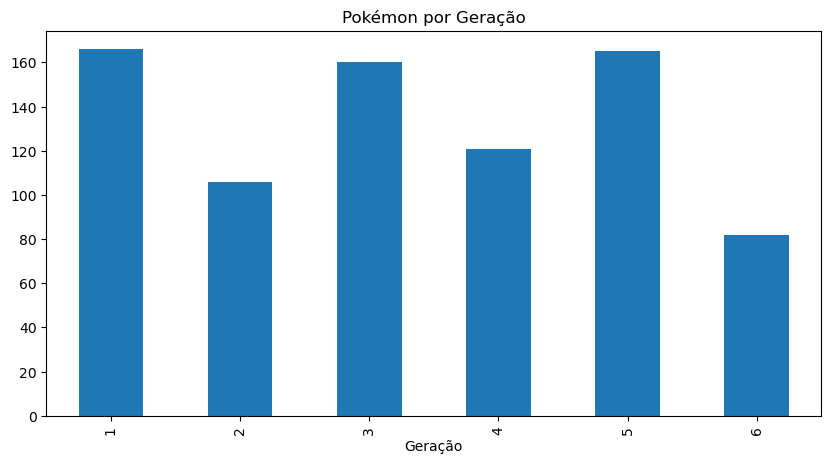

In [10]:
df.Generation.value_counts().sort_index().plot(kind='bar', figsize=(10, 5), title='Pokémon por Geração')
plt.xlabel('Geração')

In [14]:
df_combat.First_pokemon.value_counts().sort_index()

First_pokemon
1      70
2      55
3      68
4      62
5      50
       ..
796    49
797    64
798    60
799    75
800    61
Name: count, Length: 784, dtype: int64

In [15]:
df['id'] = df.index

In [16]:
df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,id
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,1
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,2
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,3
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,4
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,5


In [17]:
df_merged = df_combat.merge(df, left_on='First_pokemon', right_on='id', how='left')

df_merged = df_merged.rename(columns={
    'Name': 'First_Name',
    'Type 1': 'First_Type 1',
    'Total': 'First_Total',
    'HP': 'First_HP',
    'Attack': 'First_Attack',
    'Defense': 'First_Defense',
    'Sp. Atk': 'First_Sp. Atk',
    'Sp. Def': 'First_Sp. Def',
    'Speed': 'First_Speed',
    'Legendary': 'First_Legendary'
})

In [18]:
df_merged2 = df_merged.merge(df, left_on='Second_pokemon', right_on='id', how='left')

df_merged2 = df_merged2.rename(columns={
    'Name': 'Second_Name',
    'Type 1': 'Second_Type 1',
    'Total': 'Second_Total',
    'HP': 'Second_HP',
    'Attack': 'Second_Attack',
    'Defense': 'Second_Defense',
    'Sp. Atk': 'Second_Sp. Atk',
    'Sp. Def': 'Second_Sp. Def',
    'Speed': 'Second_Speed',
    'Legendary': 'Second_Legendary'
})

In [19]:
df_merged2.head()

,First_pokemon,Second_pokemon,Winner,First_Name,First_Type 1,Type 2_x,First_HP,First_Attack,First_Defense,First_Sp. Atk,...,Type 2_y,Second_HP,Second_Attack,Second_Defense,Second_Sp. Atk,Second_Sp. Def,Second_Speed,Generation_y,Second_Legendary,id_y
0,266,298,298,Larvitar,Rock,Ground,50,64,50,45,...,Dark,70,70,40,60,40,60,3,False,298
1,702,701,701,Virizion,Grass,Fighting,91,90,72,90,...,Fighting,91,129,90,72,90,108,5,True,701
2,191,668,668,Togetic,Fairy,Flying,55,40,85,80,...,NaN,75,75,75,125,95,40,5,False,668
3,237,683,683,Slugma,Fire,NaN,40,40,40,70,...,NaN,77,120,90,60,90,48,5,False,683
4,151,231,151,Omastar,Rock,Water,70,60,125,115,...,Rock,20,10,230,10,230,5,2,False,231


In [20]:
df_merged2.columns

Index(['First_pokemon', 'Second_pokemon', 'Winner', 'First_Name',
       'First_Type 1', 'Type 2_x', 'First_HP', 'First_Attack', 'First_Defense',
       'First_Sp. Atk', 'First_Sp. Def', 'First_Speed', 'Generation_x',
       'First_Legendary', 'id_x', 'Second_Name', 'Second_Type 1', 'Type 2_y',
       'Second_HP', 'Second_Attack', 'Second_Defense', 'Second_Sp. Atk',
       'Second_Sp. Def', 'Second_Speed', 'Generation_y', 'Second_Legendary',
       'id_y'],
      dtype='object')

In [21]:
df_merged2['label'] = (df_merged2['Winner'] == df_merged2['First_pokemon']).astype(int)
df_merged2 = df_merged2.drop(columns=['Winner'])

In [24]:
df_merged2.head()

,First_pokemon,Second_pokemon,First_Name,First_Type 1,Type 2_x,First_HP,First_Attack,First_Defense,First_Sp. Atk,First_Sp. Def,First_Speed,Generation_x,First_Legendary,id_x,Second_Name,Second_Type 1,Type 2_y,Second_HP,Second_Attack,Second_Defense,Second_Sp. Atk,Second_Sp. Def,Second_Speed,Generation_y,Second_Legendary,id_y,label
0,266,298,Larvitar,Rock,Ground,50,64,50,45,50,41,2,False,266,Nuzleaf,Grass,Dark,70,70,40,60,40,60,3,False,298,0
1,702,701,Virizion,Grass,Fighting,91,90,72,90,129,108,5,True,702,Terrakion,Rock,Fighting,91,129,90,72,90,108,5,True,701,0
2,191,668,Togetic,Fairy,Flying,55,40,85,80,105,40,2,False,191,Beheeyem,Psychic,NaN,75,75,75,125,95,40,5,False,668,0
3,237,683,Slugma,Fire,NaN,40,40,40,70,40,20,2,False,237,Druddigon,Dragon,NaN,77,120,90,60,90,48,5,False,683,0
4,151,231,Omastar,Rock,Water,70,60,125,115,70,55,1,False,151,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,231,1


In [26]:
df_merged2['Generation_x'] = df_merged2['Generation_x'].astype('category')
df_merged2['Generation_y'] = df_merged2['Generation_y'].astype('category')
df_merged2['First_Legendary'] = df_merged2['First_Legendary'].astype('int')
df_merged2['Second_Legendary'] = df_merged2['Second_Legendary'].astype('int')

In [27]:
target = 'label'
ignore_cols = ['First_pokemon', 'Second_pokemon', 'id_x', 'Second_Name', 'First_Name', 'id_y']
numeric_preds = list(set(df_merged2._get_numeric_data().columns) - set([target] + ignore_cols))
cat_preds = list(set(df_merged2.columns)-set(numeric_preds)-set([target] + ignore_cols))
features = list(set(numeric_preds + cat_preds) - set(ignore_cols))

In [29]:
cat_preds

['First_Type 1',
 'Generation_x',
 'Second_Type 1',
 'Type 2_x',
 'Type 2_y',
 'Generation_y']

In [32]:
df_encoded = pd.get_dummies(df_merged2, columns=cat_preds, drop_first=True)
df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes('bool').columns})
df_encoded


,First_pokemon,Second_pokemon,First_Name,First_HP,First_Attack,First_Defense,First_Sp. Atk,First_Sp. Def,First_Speed,First_Legendary,id_x,Second_Name,Second_HP,Second_Attack,Second_Defense,Second_Sp. Atk,Second_Sp. Def,Second_Speed,Second_Legendary,id_y,label,First_Type 1_Dark,First_Type 1_Dragon,First_Type 1_Electric,First_Type 1_Fairy,First_Type 1_Fighting,First_Type 1_Fire,First_Type 1_Flying,First_Type 1_Ghost,First_Type 1_Grass,First_Type 1_Ground,First_Type 1_Ice,First_Type 1_Normal,First_Type 1_Poison,First_Type 1_Psychic,First_Type 1_Rock,First_Type 1_Steel,First_Type 1_Water,Generation_x_2,Generation_x_3,Generation_x_4,Generation_x_5,Generation_x_6,Second_Type 1_Dark,Second_Type 1_Dragon,Second_Type 1_Electric,Second_Type 1_Fairy,Second_Type 1_Fighting,Second_Type 1_Fire,Second_Type 1_Flying,Second_Type 1_Ghost,Second_Type 1_Grass,Second_Type 1_Ground,Second_Type 1_Ice,Second_Type 1_Normal,Second_Type 1_Poison,Second_Type 1_Psychic,Second_Type 1_Rock,Second_Type 1_Steel,Second_Type 1_Water,Type 2_x_Dark,Type 2_x_Dragon,Type 2_x_Electric,Type 2_x_Fairy,Type 2_x_Fighting,Type 2_x_Fire,Type 2_x_Flying,Type 2_x_Ghost,Type 2_x_Grass,Type 2_x_Ground,Type 2_x_Ice,Type 2_x_Normal,Type 2_x_Poison,Type 2_x_Psychic,Type 2_x_Rock,Type 2_x_Steel,Type 2_x_Water,Type 2_y_Dark,Type 2_y_Dragon,Type 2_y_Electric,Type 2_y_Fairy,Type 2_y_Fighting,Type 2_y_Fire,Type 2_y_Flying,Type 2_y_Ghost,Type 2_y_Grass,Type 2_y_Ground,Type 2_y_Ice,Type 2_y_Normal,Type 2_y_Poison,Type 2_y_Psychic,Type 2_y_Rock,Type 2_y_Steel,Type 2_y_Water,Generation_y_2,Generation_y_3,Generation_y_4,Generation_y_5,Generation_y_6
0,266,298,Larvitar,50,64,50,45,50,41,0,266,Nuzleaf,70,70,40,60,40,60,0,298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,702,701,Virizion,91,90,72,90,129,108,1,702,Terrakion,91,129,90,72,90,108,1,701,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,191,668,Togetic,55,40,85,80,105,40,0,191,Beheeyem,75,75,75,125,95,40,0,668,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,237,683,Slugma,40,40,40,70,40,20,0,237,Druddigon,77,120,90,60,90,48,0,683,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,151,231,Omastar,70,60,125,115,70,55,0,151,Shuckle,20,10,230,10,230,5,0,231,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,707,126,Reshiram,100,120,100,150,120,90,1,707,Horsea,30,40,70,70,25,60,0,126,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49996,589,664,Drilbur,60,85,40,30,45,68,0,589,Tynamo,35,55,40,45,40,60,0,664,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
49997,303,368,Pelipper,60,50,100,85,70,65,0,303,Zangoose,73,115,60,60,60,90,0,368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
49998,109,89,Voltorb,40,30,50,55,55,100,0,109,Magnemite,25,35,70,95,55,45,0,89,1,0,0,1,0,0,0,

In [33]:
target = 'label'
ignore_cols = ['First_pokemon', 'Second_pokemon', 'id_x', 'Second_Name', 'First_Name', 'id_y']
numeric_preds = list(set(df_encoded._get_numeric_data().columns) - set([target] + ignore_cols))
cat_preds = list(set(df_encoded.columns)-set(numeric_preds)-set([target] + ignore_cols))
features = list(set(numeric_preds + cat_preds) - set(ignore_cols))

In [47]:
X = df_encoded[features]
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X,y ,train_size = 0.8,random_state=77)

In [48]:
X_test.isnull().sum().sum()

0

In [49]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (40000, 92)
X_test shape: (10000, 92)
y_train shape: (40000,)
y_test shape: (10000,)


In [50]:
import statsmodels.api as sm
X_train_cte = sm.add_constant(X_train)

# Ajuste do modelo GLM binomial
glm_binom = sm.GLM(y_train, X_train_cte, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  label   No. Observations:                40000
Model:                            GLM   Df Residuals:                    39907
Model Family:                Binomial   Df Model:                           92
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14018.
Date:                Wed, 11 Jun 2025   Deviance:                       28035.
Time:                        21:21:31   Pearson chi2:                 2.53e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4944
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [61]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
)

# Adiciona constante
X_train_const = sm.add_constant(X_train, has_constant='add')
X_test_const = sm.add_constant(X_test, has_constant='add')

# Modelo de resposta binária e ligação logito
modelo_logit = sm.GLM(y_train, X_train_const, family=sm.families.Binomial()).fit()
pred_logit_train = modelo_logit.predict(X_train_const)  # Previsões no conjunto de treino
pred_logit_test = modelo_logit.predict(X_test_const)   # Previsões no conjunto de teste
bin_logit_train = (pred_logit_train >= 0.5).astype(int)  # Classificação binária para treino
bin_logit_test = (pred_logit_test >= 0.5).astype(int)    # Classificação binária para teste

# Modelo de resposta binária e ligação probito
modelo_probit = sm.GLM(y_train, X_train_const, family=sm.families.Binomial(link=sm.families.links.Probit())).fit()
pred_probit_train = modelo_probit.predict(X_train_const)  # Previsões no conjunto de treino
pred_probit_test = modelo_probit.predict(X_test_const)   # Previsões no conjunto de teste
bin_probit_train = (pred_probit_train >= 0.5).astype(int)  # Classificação binária para treino
bin_probit_test = (pred_probit_test >= 0.5).astype(int)    # Classificação binária para teste

# Resultados
print('--- Avaliação nos Dados de Treinamento e Teste ---\n')

# Modelo Logit
print('Modelo Logit:')
print(f'  AIC treinamento:     {modelo_logit.aic:.2f}')
print(f'  Acurácia treino:     {accuracy_score(y_train, bin_logit_train):.3f}')
print(f'  Acurácia teste:      {accuracy_score(y_test, bin_logit_test):.3f}')
print(f'  AUC treino:          {roc_auc_score(y_train, pred_logit_train):.3f}')
print(f'  AUC teste:           {roc_auc_score(y_test, pred_logit_test):.3f}\n')

# Modelo Probit
print('Modelo Probit:')
print(f'  AIC treinamento:     {modelo_probit.aic:.2f}')
print(f'  Acurácia treino:     {accuracy_score(y_train, bin_probit_train):.3f}')
print(f'  Acurácia teste:      {accuracy_score(y_test, bin_probit_test):.3f}')
print(f'  AUC treino:          {roc_auc_score(y_train, pred_probit_train):.3f}')
print(f'  AUC teste:           {roc_auc_score(y_test, pred_probit_test):.3f}')

--- Avaliação nos Dados de Treinamento e Teste ---

Modelo Logit:
  AIC treinamento:     28221.03
  Acurácia treino:     0.890
  Acurácia teste:      0.885
  AUC treino:          0.932
  AUC teste:           0.930

Modelo Probit:
  AIC treinamento:     29449.50
  Acurácia treino:     0.877
  Acurácia teste:      0.871
  AUC treino:          0.930
  AUC teste:           0.927


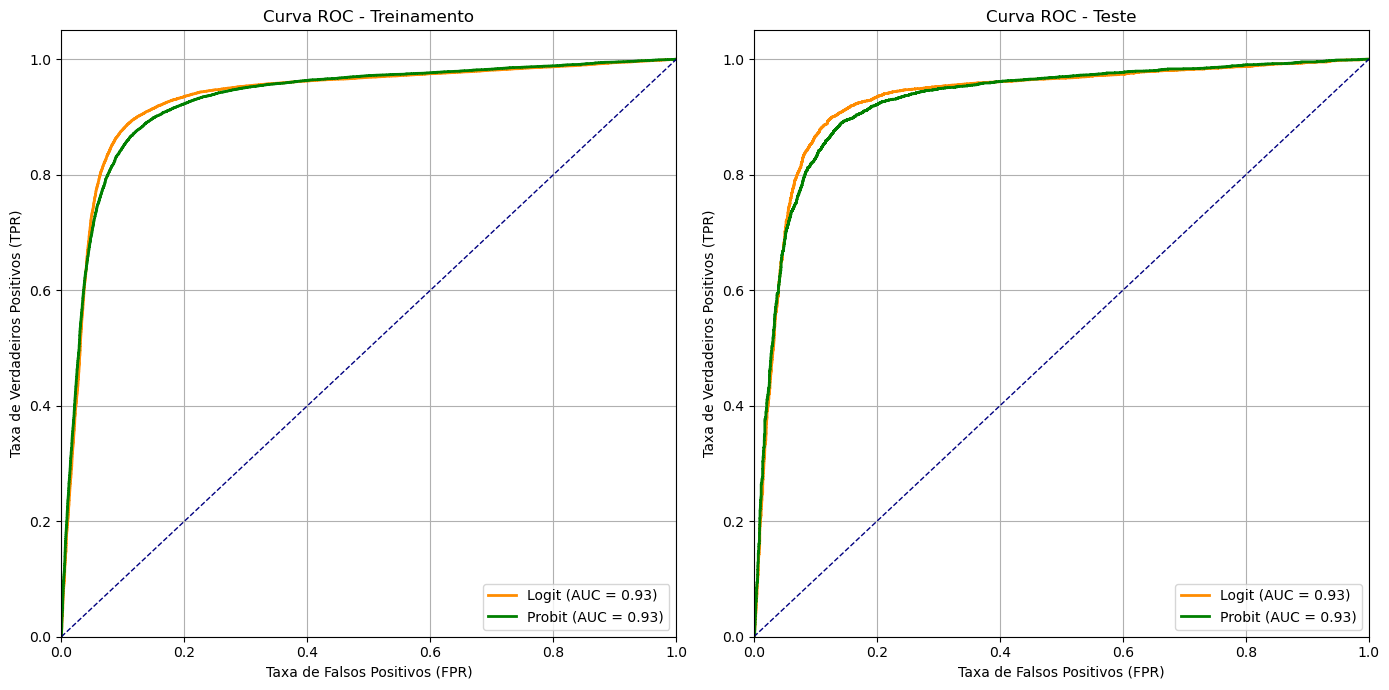

In [62]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Curva ROC para modelo logito - treino
fpr_logit_train, tpr_logit_train, _ = roc_curve(y_train, pred_logit_train)
roc_auc_logit_train = auc(fpr_logit_train, tpr_logit_train)

# Curva ROC para modelo probito - treino
fpr_probit_train, tpr_probit_train, _ = roc_curve(y_train, pred_probit_train)
roc_auc_probit_train = auc(fpr_probit_train, tpr_probit_train)

# Curva ROC para modelo logito - teste
fpr_logit_test, tpr_logit_test, _ = roc_curve(y_test, pred_logit_test)
roc_auc_logit_test = auc(fpr_logit_test, tpr_logit_test)

# Curva ROC para modelo probito - teste
fpr_probit_test, tpr_probit_test, _ = roc_curve(y_test, pred_probit_test)
roc_auc_probit_test = auc(fpr_probit_test, tpr_probit_test)

# Plot
plt.figure(figsize=(14, 7))

# Curvas ROC para treino
plt.subplot(1, 2, 1)
plt.plot(fpr_logit_train, tpr_logit_train, color='darkorange', lw=2,
         label='Logit (AUC = %0.2f)' % roc_auc_logit_train)
plt.plot(fpr_probit_train, tpr_probit_train, color='green', lw=2,
         label='Probit (AUC = %0.2f)' % roc_auc_probit_train)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Treinamento')
plt.legend(loc="lower right")
plt.grid()

# Curvas ROC para teste
plt.subplot(1, 2, 2)
plt.plot(fpr_logit_test, tpr_logit_test, color='darkorange', lw=2,
         label='Logit (AUC = %0.2f)' % roc_auc_logit_test)
plt.plot(fpr_probit_test, tpr_probit_test, color='green', lw=2,
         label='Probit (AUC = %0.2f)' % roc_auc_probit_test)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Teste')
plt.legend(loc="lower right")
plt.grid()

plt.tight_layout()
plt.show()


### Selecionando algumas var

In [53]:
def stepwise_aic(X, y, verbose=True):
    X = X.copy()
    X = sm.add_constant(X)
    included = []
    best_aic = float('inf')

    while True:
        changed = False
        excluded = list(set(X.columns) - set(included) - {'const'})

        # Testa adições
        candidates = []
        for new_col in excluded:
            try:
                model = sm.GLM(y, X[['const'] + included + [new_col]], family=sm.families.Binomial()).fit()
                candidates.append((model.aic, new_col, 'add'))
            except:
                continue

        # Testa remoções
        for remove_col in included:
            try:
                vars_test = [var for var in included if var != remove_col]
                model = sm.GLM(y, X[['const'] + vars_test], family=sm.families.Binomial()).fit()
                candidates.append((model.aic, remove_col, 'remove'))
            except:
                continue

        # Encontra o melhor movimento
        if candidates:
            candidates.sort()
            best_candidate_aic, best_candidate_var, action = candidates[0]
            if best_candidate_aic < best_aic:
                changed = True
                best_aic = best_candidate_aic
                if action == 'add':
                    included.append(best_candidate_var)
                    if verbose:
                        print(f' + {best_candidate_var:30} AIC={best_aic:.2f}')
                else:
                    included.remove(best_candidate_var)
                    if verbose:
                        print(f' - {best_candidate_var:30} AIC={best_aic:.2f}')

        if not changed:
            break

    if verbose:
        print('\nFinal model variables:')
        print(included)
    return included


In [54]:
selecionadas = stepwise_aic(X_train, y_train)
# Modelo final com variáveis selecionadas
X_sel = sm.add_constant(X_train[selecionadas])
modelo = sm.GLM(y_train, X_sel, family=sm.families.Binomial()).fit()
print(modelo.summary())

 + First_Speed                    AIC=44523.70
 + Second_Speed                   AIC=30344.90
 + Second_Attack                  AIC=29807.17
 + First_Attack                   AIC=29341.25
 + Type 2_y_Ghost                 AIC=28879.19
 + Type 2_x_Ghost                 AIC=28746.99
 + Type 2_y_Steel                 AIC=28703.02
 + Second_Type 1_Ghost            AIC=28657.24
 + Second_Type 1_Normal           AIC=28614.47
 + First_Type 1_Dark              AIC=28575.06
 + Second_Type 1_Dark             AIC=28539.33
 + Type 2_x_Flying                AIC=28504.67
 + First_Type 1_Ground            AIC=28481.32
 + First_Type 1_Fire              AIC=28461.57
 + Type 2_x_Rock                  AIC=28444.76
 + Second_Defense                 AIC=28428.08
 + First_Sp. Def                  AIC=28413.38
 + First_Type 1_Psychic           AIC=28392.35
 + Type 2_y_Flying                AIC=28377.94
 + First_Type 1_Ghost             AIC=28363.56
 + Generation_x_5                 AIC=28351.05
 + Generation

In [59]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
)

# Adiciona constante
X_test_const_sel = sm.add_constant(X_test[selecionadas], has_constant='add')

# Modelo de resposta binária e ligação logito
pred_logit_trains = modelo.predict(X_sel)  # Previsões no conjunto de treino
pred_logit_tests = modelo.predict(X_test_const_sel)   # Previsões no conjunto de teste
bin_logit_trains = (pred_logit_trains >= 0.5).astype(int)  # Classificação binária para treino
bin_logit_tests = (pred_logit_tests >= 0.5).astype(int)    # Classificação binária para teste

# Resultados
print('--- Avaliação nos Dados de Treinamento e Teste ---\n')

# Modelo Logit
print('Modelo Logit:')
print(f'  AIC treinamento:     {modelo.aic:.2f}')
print(f'  Acurácia treino:     {accuracy_score(y_train, bin_logit_trains):.3f}')
print(f'  Acurácia teste:      {accuracy_score(y_test, bin_logit_tests):.3f}')
print(f'  AUC treino:          {roc_auc_score(y_train, pred_logit_trains):.3f}')
print(f'  AUC teste:           {roc_auc_score(y_test, pred_logit_tests):.3f}\n')


--- Avaliação nos Dados de Treinamento e Teste ---

Modelo Logit:
  AIC treinamento:     28176.61
  Acurácia treino:     0.891
  Acurácia teste:      0.885
  AUC treino:          0.932
  AUC teste:           0.930



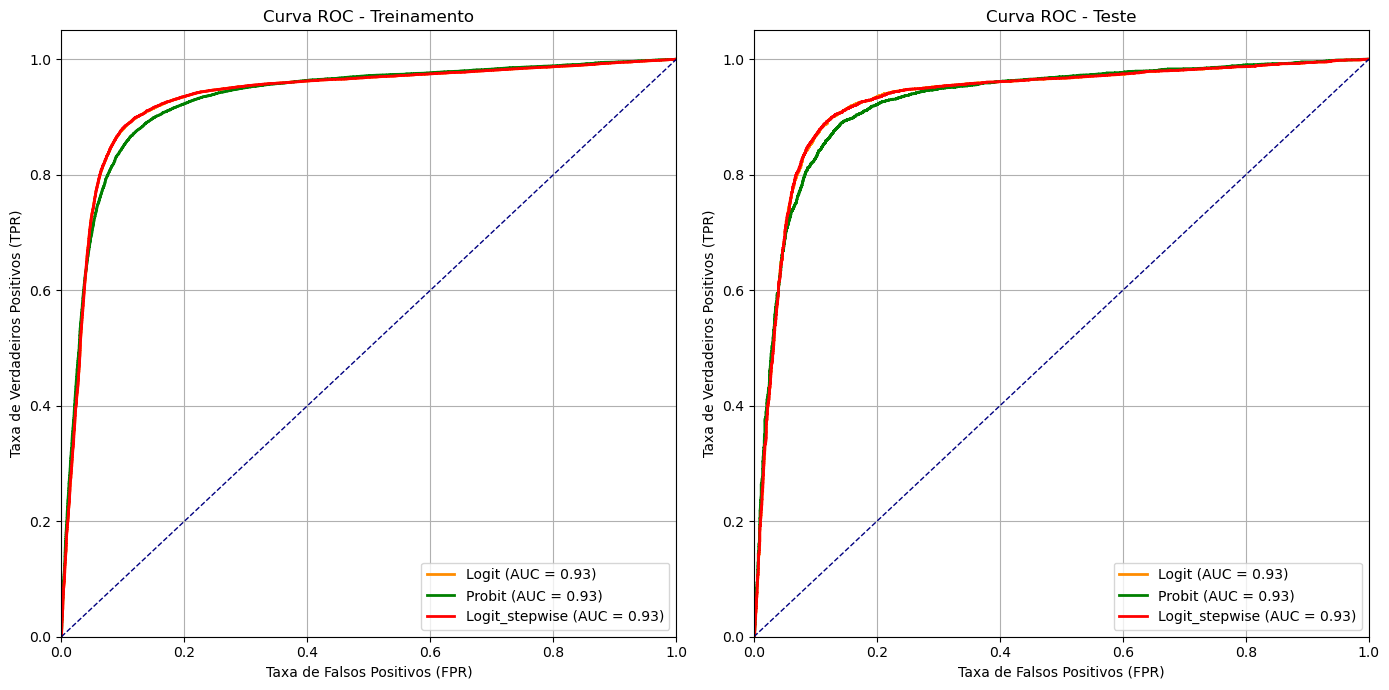

In [64]:

# Curva ROC para modelo logito - treino
fpr_logit_trains, tpr_logit_trains, _ = roc_curve(y_train, pred_logit_trains)
roc_auc_logit_trains = auc(fpr_logit_trains, tpr_logit_trains)


# Curva ROC para modelo logito - teste
fpr_logit_tests, tpr_logit_tests, _ = roc_curve(y_test, pred_logit_tests)
roc_auc_logit_tests = auc(fpr_logit_tests, tpr_logit_tests)

# Plot
plt.figure(figsize=(14, 7))

# Curvas ROC para treino
plt.subplot(1, 2, 1)
plt.plot(fpr_logit_train, tpr_logit_train, color='darkorange', lw=2,
         label='Logit (AUC = %0.2f)' % roc_auc_logit_train)
plt.plot(fpr_probit_train, tpr_probit_train, color='green', lw=2,
         label='Probit (AUC = %0.2f)' % roc_auc_probit_train)
plt.plot(fpr_logit_trains, tpr_logit_trains, color='red', lw=2,
         label='Logit_stepwise (AUC = %0.2f)' % roc_auc_logit_trains)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Treinamento')
plt.legend(loc="lower right")
plt.grid()

# Curvas ROC para teste
plt.subplot(1, 2, 2)
plt.plot(fpr_logit_test, tpr_logit_test, color='darkorange', lw=2,
         label='Logit (AUC = %0.2f)' % roc_auc_logit_test)
plt.plot(fpr_probit_test, tpr_probit_test, color='green', lw=2,
         label='Probit (AUC = %0.2f)' % roc_auc_probit_test)
plt.plot(fpr_logit_tests, tpr_logit_tests, color='red', lw=2,
         label='Logit_stepwise (AUC = %0.2f)' % roc_auc_logit_tests)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Teste')
plt.legend(loc="lower right")
plt.grid()

plt.tight_layout()
plt.show()


### Tentando fazer prever batalhas

In [84]:
def predict_winner(pokemon1_name, pokemon2_name, df_stats, model, features):
    battle = df_stats[(df_stats['First_Name'] == pokemon1_name) & (df_stats['Second_Name'] == pokemon2_name)]
    features = sm.add_constant(features, has_constant='add')
    prediction = model.predict(battle[features])
    prediction = 1 if prediction >= 0.5 else 0
    return f"winner: {pokemon1_name}" if prediction == 1 else f"winner: {pokemon2_name}"

In [85]:
df_merged2.head()

,First_pokemon,Second_pokemon,First_Name,First_Type 1,Type 2_x,First_HP,First_Attack,First_Defense,First_Sp. Atk,First_Sp. Def,First_Speed,Generation_x,First_Legendary,id_x,Second_Name,Second_Type 1,Type 2_y,Second_HP,Second_Attack,Second_Defense,Second_Sp. Atk,Second_Sp. Def,Second_Speed,Generation_y,Second_Legendary,id_y,label
0,266,298,Larvitar,Rock,Ground,50,64,50,45,50,41,2,0,266,Nuzleaf,Grass,Dark,70,70,40,60,40,60,3,0,298,0
1,702,701,Virizion,Grass,Fighting,91,90,72,90,129,108,5,1,702,Terrakion,Rock,Fighting,91,129,90,72,90,108,5,1,701,0
2,191,668,Togetic,Fairy,Flying,55,40,85,80,105,40,2,0,191,Beheeyem,Psychic,NaN,75,75,75,125,95,40,5,0,668,0
3,237,683,Slugma,Fire,NaN,40,40,40,70,40,20,2,0,237,Druddigon,Dragon,NaN,77,120,90,60,90,48,5,0,683,0
4,151,231,Omastar,Rock,Water,70,60,125,115,70,55,1,0,151,Shuckle,Bug,Rock,20,10,230,10,230,5,2,0,231,1


In [80]:
pokemon1_name = 'Larvitar'
pokemon2_name = 'Nuzleaf'
battle = df_merged2[(df_merged2['First_Name'] == pokemon1_name) & (df_merged2['Second_Name'] == pokemon2_name)]

In [81]:
battle

,First_pokemon,Second_pokemon,First_Name,First_Type 1,Type 2_x,First_HP,First_Attack,First_Defense,First_Sp. Atk,First_Sp. Def,First_Speed,Generation_x,First_Legendary,id_x,Second_Name,Second_Type 1,Type 2_y,Second_HP,Second_Attack,Second_Defense,Second_Sp. Atk,Second_Sp. Def,Second_Speed,Generation_y,Second_Legendary,id_y,label
0,266,298,Larvitar,Rock,Ground,50,64,50,45,50,41,2,0,266,Nuzleaf,Grass,Dark,70,70,40,60,40,60,3,0,298,0


In [86]:
predict_winner("Larvitar", "Nuzleaf", df_merged2, modelo, selecionadas)

UFuncTypeError: ufunc 'maximum' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U21')) -> None